In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tools import cdffit, pdffit

In [3]:
### Generate a random sample

In [4]:
x = np.random.normal(size=100)

(array([0.01991739, 0.09958695, 0.21909129, 0.43818258, 0.35851302,
        0.27884346, 0.27884346, 0.15933912, 0.07966956, 0.05975217]),
 array([-2.35863075, -1.85655693, -1.35448312, -0.85240931, -0.3503355 ,
         0.15173831,  0.65381213,  1.15588594,  1.65795975,  2.16003356,
         2.66210737]),
 <BarContainer object of 10 artists>)

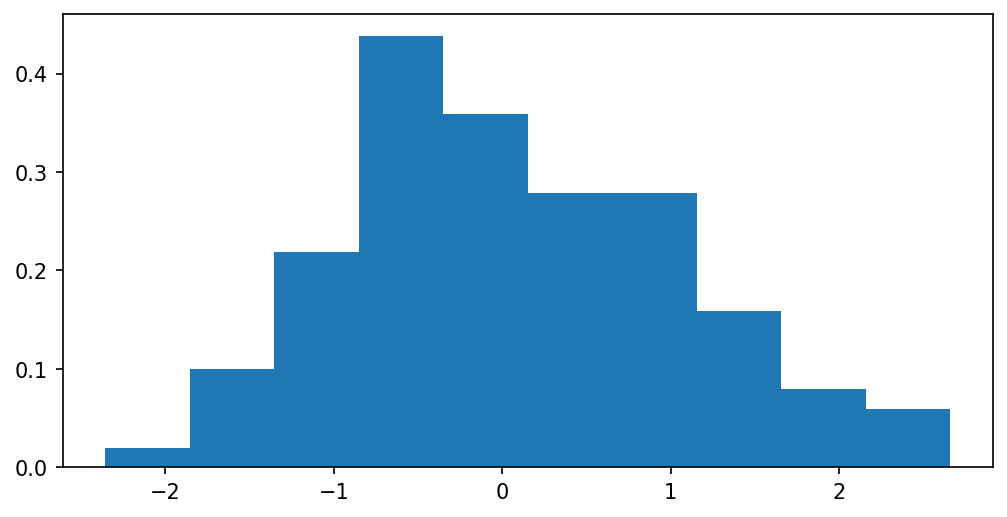

In [5]:
fig = plt.figure(dpi=150, figsize=(8, 4))
ax = fig.add_subplot()
ax.hist(x, density=True)

In [6]:
### Visualize the Histograms, ECDF, pECDF

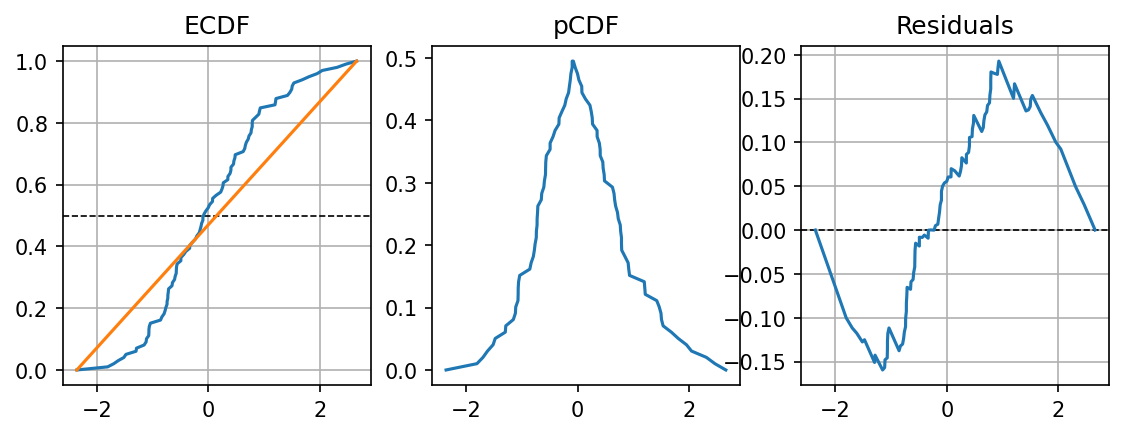

In [7]:
x.sort()
y = np.linspace(0, 1, len(x))
ref = (x-x.min())/(x.max()-x.min())
res = y - ref
pcdf = y.copy()
pcdf[y>0.5] = 1 - pcdf[y>0.5]


fig = plt.figure(dpi=150, figsize=(9, 3))
ax = fig.add_subplot(131)
ax.grid()
ax.set_title('ECDF')
ax.axhline(0.5, linestyle='--', color='k', linewidth=.8)
ax.plot(x, y)
ax.plot(x, ref)

ax = fig.add_subplot(132)
ax.plot(x, pcdf)
ax.set_title('pCDF')

ax = fig.add_subplot(133)
ax.grid()
ax.set_title('Residuals')
ax.axhline(0., linestyle='--', color='k', linewidth=.8)
ax.plot(x, res)

In [8]:
### Function basis

Text(0.5, 1.0, 'basis functions')

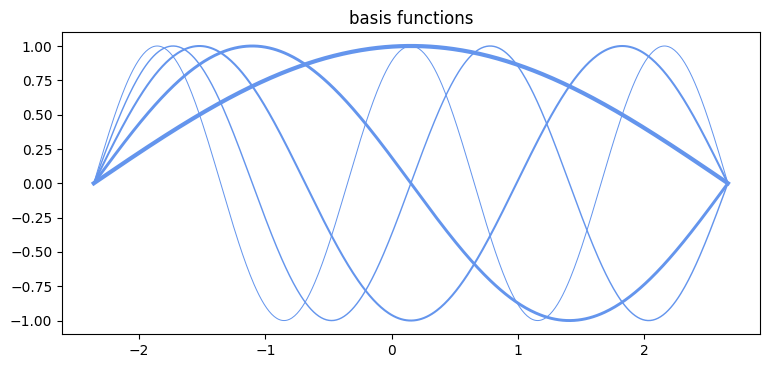

In [9]:
fig = plt.figure(dpi=100, figsize=(9, 4))
t = np.linspace(min(x), max(x), 500)
ax = fig.add_subplot()
f = np.pi / (max(x)-min(x))
n = 5
lwd = 3
for i in range(1, n+1):
    ax.plot(t, np.sin(f*i*(t-x.min())), linewidth=lwd, color='cornflowerblue')
    lwd = lwd*0.7
ax.set_title('basis functions')

In [10]:
### FIT

Text(0.5, 1.0, 'Fourier fit')

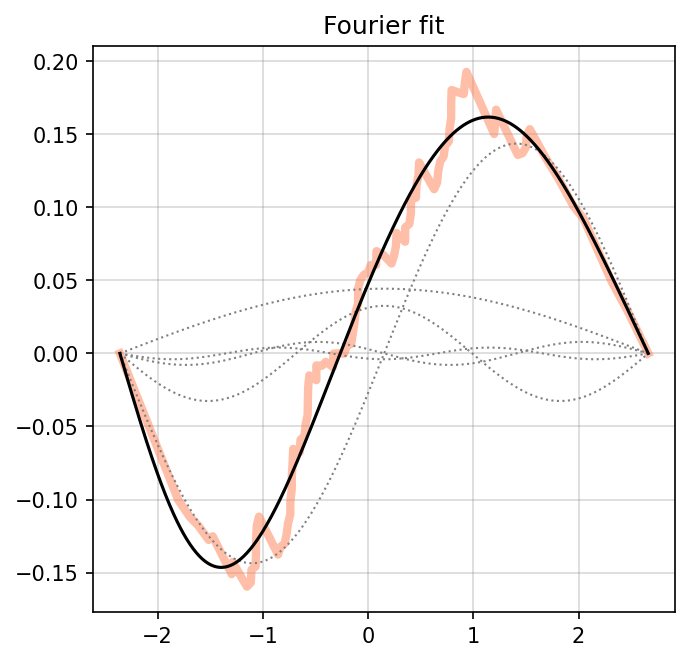

In [11]:
t = np.linspace(min(x), max(x), 500)

fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(x, res, linewidth=4, alpha=0.5, color='coral')

cols = []
f = np.pi / (max(x)-min(x))
for i in range(1, n+1):
    cols.append(np.sin(f*i*(x-min(x))))
M = np.column_stack(cols)
A = M.transpose()
pars = np.linalg.solve(A@M, A@res)

model = np.repeat(0, len(t))
for i, a in enumerate(pars):
    #mi = a*np.sin(f*(i+1)*(x-min(x)))
    mit = a*np.sin(f*(i+1)*(t-min(t)))
    ax.plot(t, mit, color='grey', linewidth=1, linestyle=':')
    model = model + mit

ax.plot(t, model, color='k', label='fit')
ax.grid(linewidth='0.2', color='dimgrey')
ax.set_title('Fourier fit')

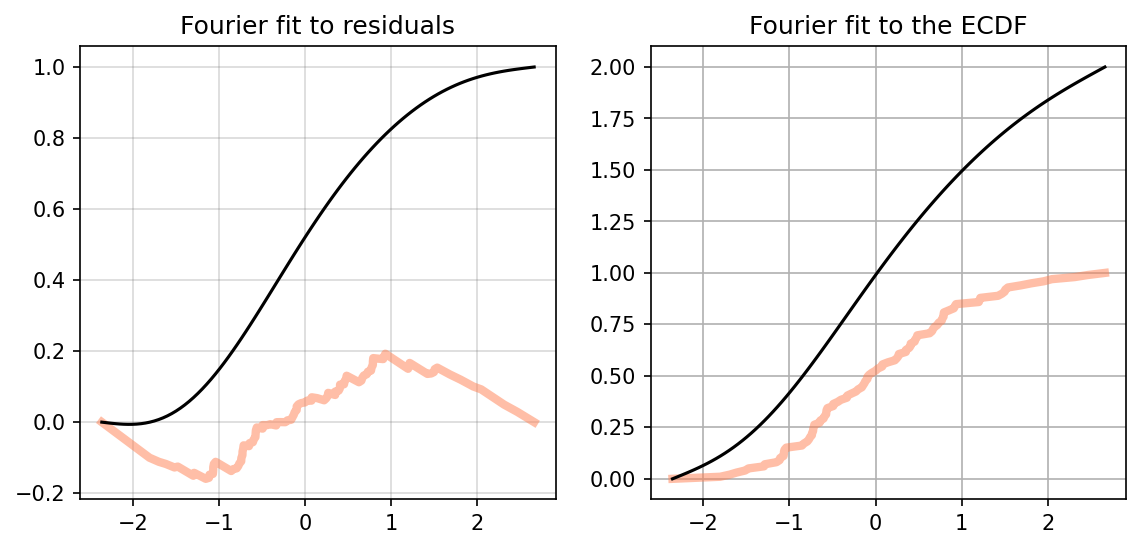

In [19]:
fig = plt.figure(dpi=150, figsize=(9, 4))
ax = fig.add_subplot(121)

ax.plot(x, res, linewidth=4, alpha=0.5, color='coral')
tt, model = cdffit(x, 4, 100)
t = np.linspace(min(x), max(x), 100)
ax.plot(t, model, color='k', label='fit')
ax.grid(linewidth='0.2', color='dimgrey')
ax.set_title('Fourier fit to residuals')

ax = fig.add_subplot(122)
ax.plot(x, y, linewidth=4, alpha=0.5, color='coral')
md = model + (t-min(x))/(max(x)-min(x))
ax.plot(t, md, color='k', label='fit')
ax.set_title('Fourier fit to the ECDF')
ax.grid()

In [ ]:
### Model for PDF

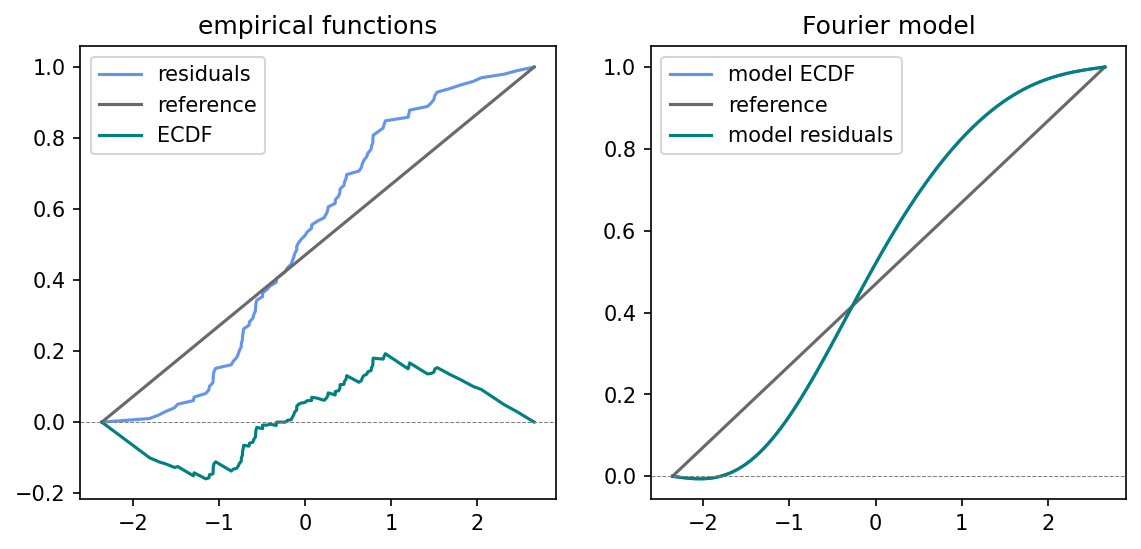

In [24]:
fig = plt.figure(dpi=150, figsize=(9, 4))
ax = fig.add_subplot(121)
ax.plot(x, y, label='residuals', color='cornflowerblue')
ax.plot(t, (t-min(x))/(max(x)-min(x)), label='reference', color='dimgrey')
ax.plot(x, res, label='ECDF', color='teal')
ax.set_title('empirical functions')
ax.axhline(0, linewidth=0.5, linestyle='--', color='grey')
ax.legend()

ax = fig.add_subplot(122)
Nt = 100
t = np.linspace(min(x), max(x), Nt)
tt, model_res = cdffit(x, 4, Nt)
model_cdf = model_res #+ (t-min(x))/(max(x)-min(x))
ax.plot(t, model_cdf, label='model ECDF', color='cornflowerblue')
ax.plot(t, (t-min(x))/(max(x)-min(x)), label='reference', color='dimgrey')
ax.plot(t, model_res, label='model residuals', color='teal')
ax.set_title('Fourier model')
ax.axhline(0, linewidth=0.5, linestyle='--', color='grey')
ax.legend()

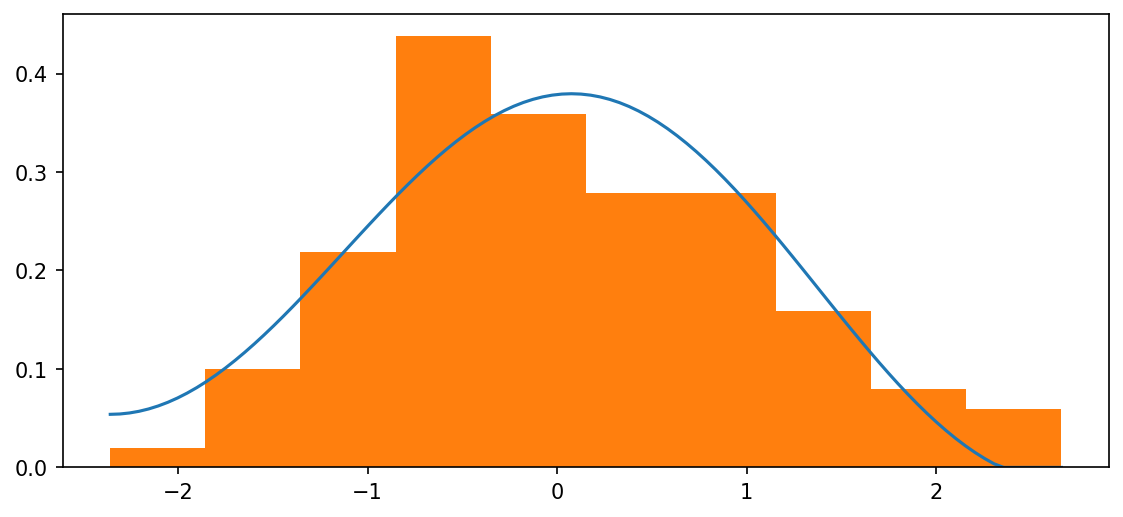

In [25]:
fx, fy = pdffit(x, 2, 100)

fig = plt.figure(dpi=150, figsize=(9, 4))
ax = fig.add_subplot()
ax.plot(fx, fy)
h = plt.hist(x, density=True)

In [26]:
### Computing uncertainties

In [27]:
 Lets try several orders for the Fourier fit and study the signifficance

SyntaxError: invalid syntax (1098824874.py, line 1)

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from tools import cdffit, pdffit, cdffit_func
from scipy.stats import kstest
from functools import partial

99 0.18354710078163983 0.0020205373079986034
1 0.05489578519177851 0.907514585140653
2 0.05154958279045779 0.940637777665972
3 0.04688918010925558 0.9731488935140602
3 0.045280368060836684 0.9807952953738613
3 0.04317409825418306 0.9883380908011077
3 0.03810532443109238 0.9975682499662428
3 0.038289152913842606 0.9973967727021326
3 0.038268345301859186 0.9974166450514581
3 0.038631395236679994 0.9970523763498308
3 0.040806447000642815 0.9939626797779942
3 0.04034615759327864 0.9947615994569395
3 0.043971146222340496 0.9857919977008771
3 0.0417419652124702 0.9920606486599394
3 0.03896234813579766 0.9966864926102611
3 0.038805843240440674 0.996863670014771
3 0.04115676376549418 0.9932956824138578
3 0.0359218334714351 0.999003354476573
3 0.03232554424869416 0.9998485936699001


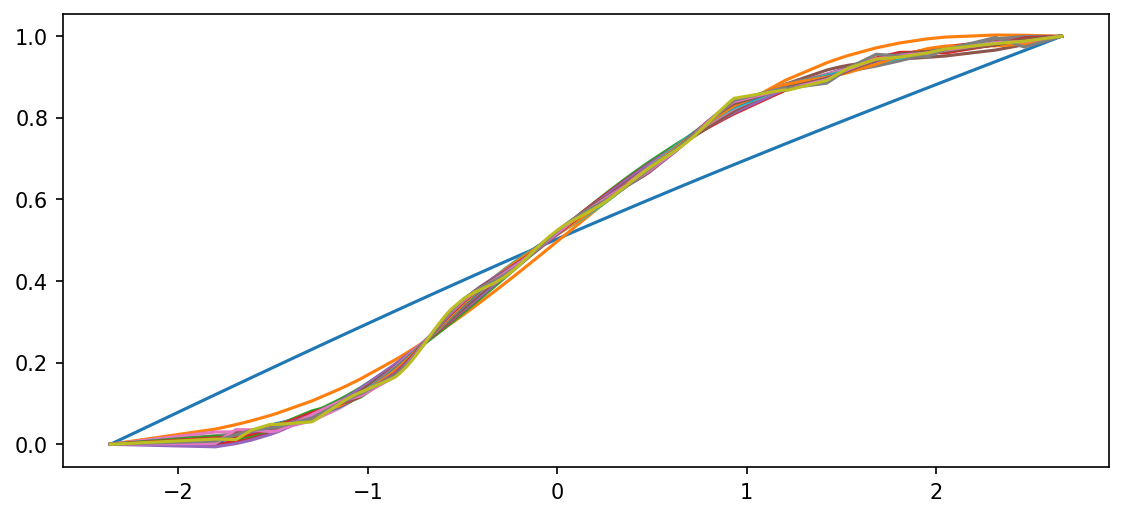

In [29]:
fig = plt.figure(dpi=150, figsize=(9, 4))
ax = fig.add_subplot()

k = 99
for n in range(1, 20):
    ft, fy = cdffit(x, n, use_data=True)
    ax.plot(ft, fy)

    g = partial(cdffit_func, n=n, t=x)
    D, pval = kstest(x, g)
    print(k, D, pval)
    if pval < 0.95:
        k = n

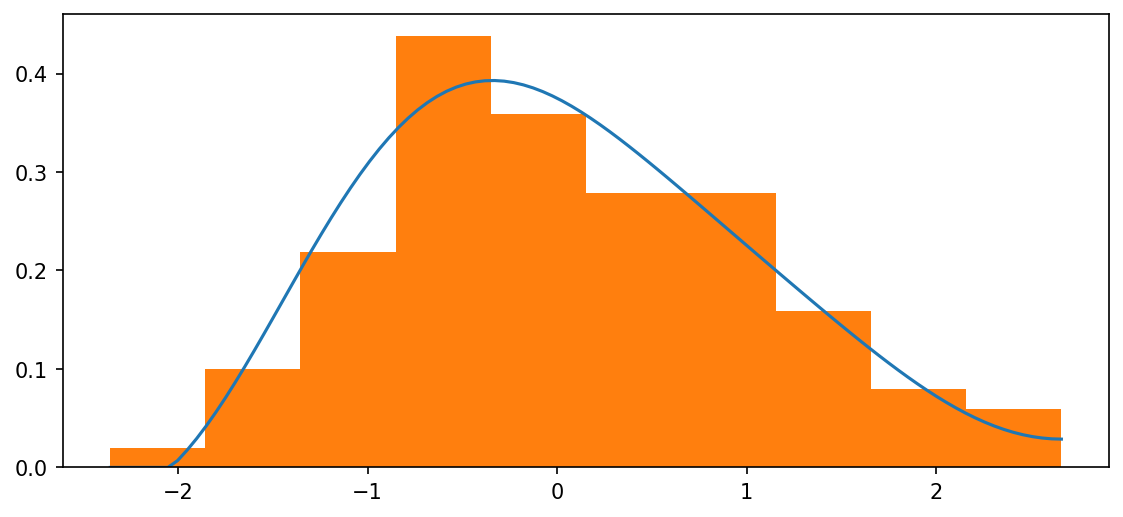

In [30]:
fx, fy = pdffit(x, k+1, 100)

fig = plt.figure(dpi=150, figsize=(9, 4))
ax = fig.add_subplot()
ax.plot(fx, fy)
h = plt.hist(x, density=True)

# Now let's try another distribution

In [31]:
from scipy.stats import gamma as g

g1 = g(a=3, loc=0, scale=0.8)
g2 = g(a=2, loc=0.5, scale=0.05)
frac1 = 0.8
N = 300
N1 = int(N*frac1)
N2 = N - N1
r1 = g1.rvs(size=N1)
r2 = g2.rvs(size=N2)
x = np.concatenate([r1, r2])